# CNN Dog Breed Classication

The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. This dataset is being imported from Kaggle

The contents of the dataset are:

 - **Number of categories**: 120
 - **Number of images**: 20,580
Since there are only about 170 images per category. It would be beneficial to use transfer learning.

I will be using the pre-trained model Inception V3 which has been trained on 'imagenet'. The weights will be freezed.

## Libraries and Config

In [90]:
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_hub as hub

import matplotlib.pyplot as plt

import math
import numpy as np
import os


In [91]:
tf.__version__

'2.15.0'

In [92]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [93]:
IMAGE_SIZE = 256
BATCH_SIZE = 256
CHANNELS = 3

In [94]:
inception = tf.keras.applications.InceptionV3(input_shape = (200,200,3),include_top=False, weights='imagenet')
inception.trainable = False #The layers are frozen

In [95]:
def class_names_txt(filepath):
    """
    Read a text file and save each line as an element in a list.

    Args:
    - filepath (str): The path to the text file.

    Returns:
    - lines (list): A list containing each line of the text file as an element.
    """
    names = []
    with open(filepath, 'r') as file:
        for line in file:
            # Remove newline characters and any trailing/leading whitespaces
            cleaned_line = line.strip()
            cleaned_line = cleaned_line.replace("'", "")
            cleaned_line = cleaned_line.replace(",", "")
            names.append(cleaned_line)
    return names

filepath = "Dataset/breeds.txt"  
class_names = class_names_txt(filepath)

## Data Augmentation

In [96]:
train_data_dir = './Dataset/Images/'

train_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                   rotation_range = 15,
                                   zoom_range = 0.2,
                                   width_shift_range=0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, #mini-batches of size 512 images are used
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, #mini-batches of size 512 images
    class_mode='categorical',
    subset='validation')


Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


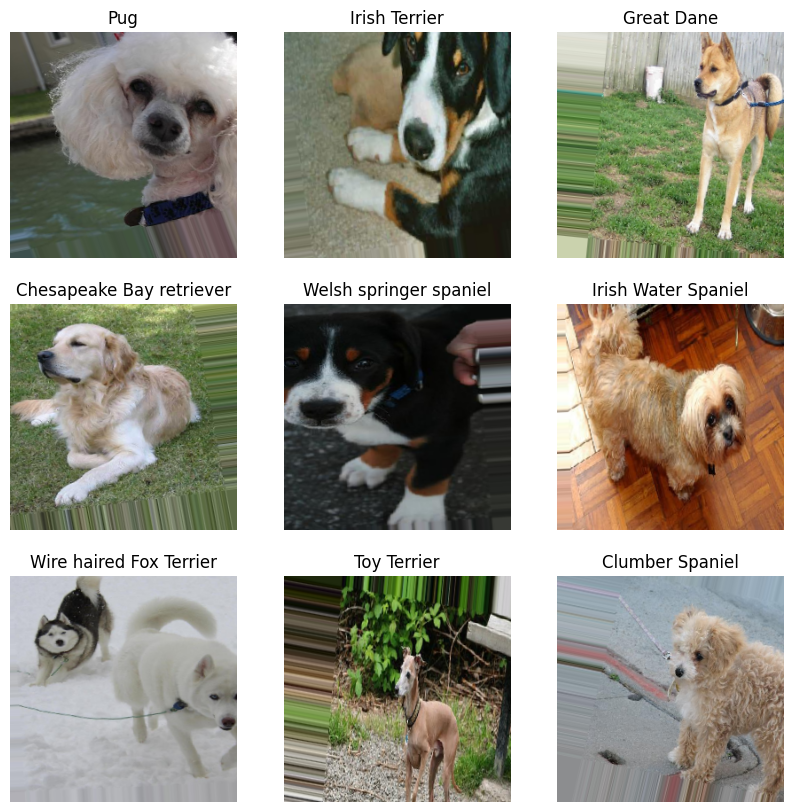

In [97]:
plt.figure(figsize=(10, 10))
images = next(train_generator)[0]
labels = next(train_generator)[1]
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

## Model